In [1]:
__author__ = "Yasaman Emami"
__email__ = ['emami.yasamann@gmail.com','yasaman.emami@sjsu.edu']

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel("ENB2012_data.xlsx", index_col = False)

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Normilized data

In [4]:
# import pandas as pd
# from sklearn import preprocessing

# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

In [5]:
# df.head()

In [6]:
df.columns = [ "Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load" ]

## Checking data descriptive statistics and missing values

In [7]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

## Correlation Matrix

In [9]:
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [10]:
df.columns[:9]

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load'],
      dtype='object')

## Scatter Plot

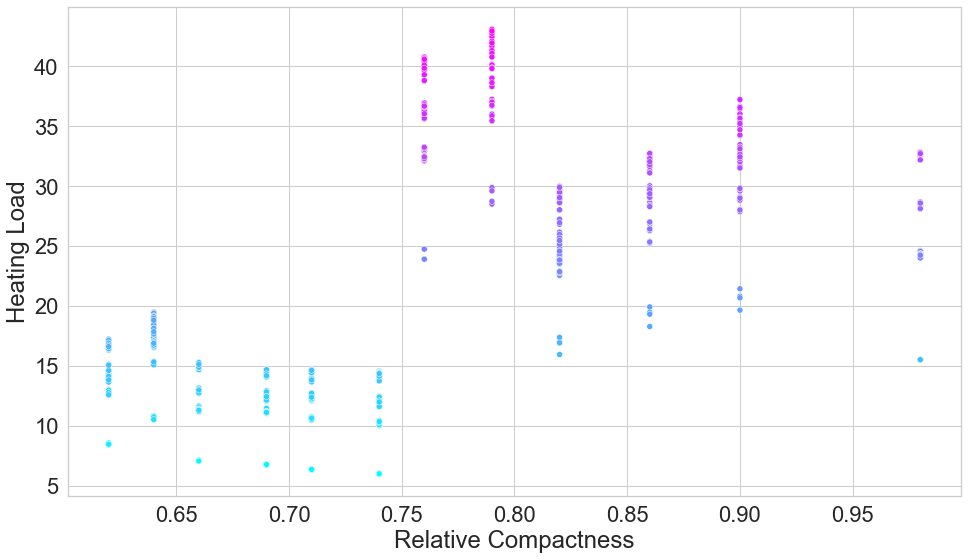

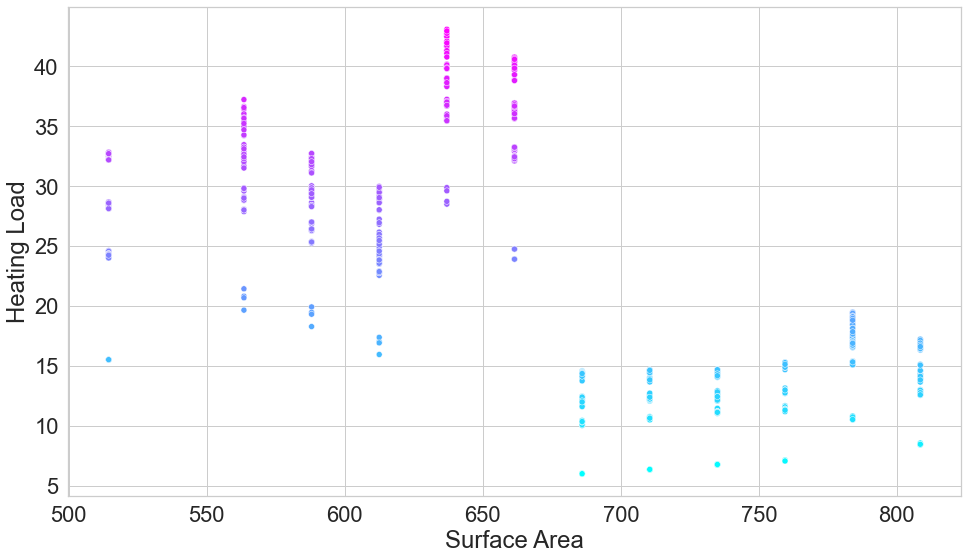

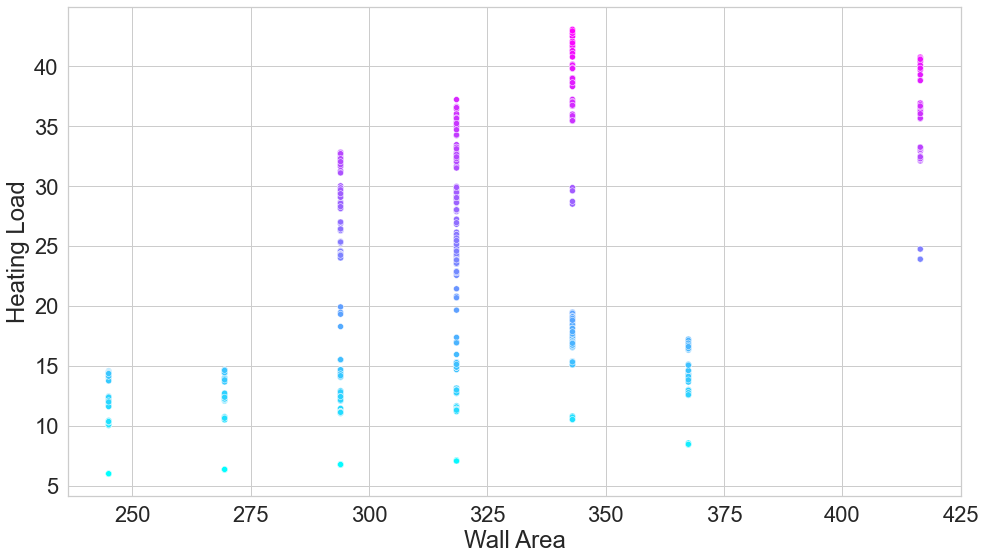

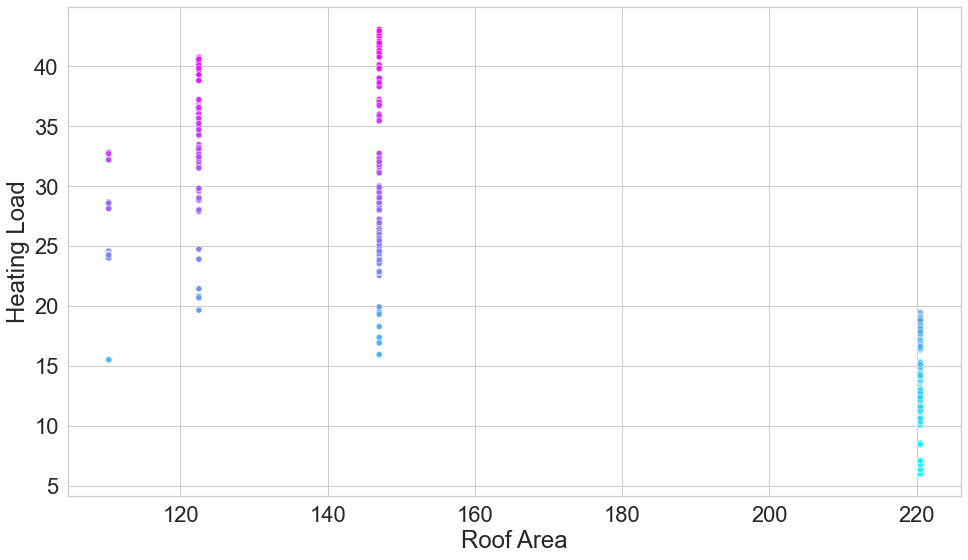

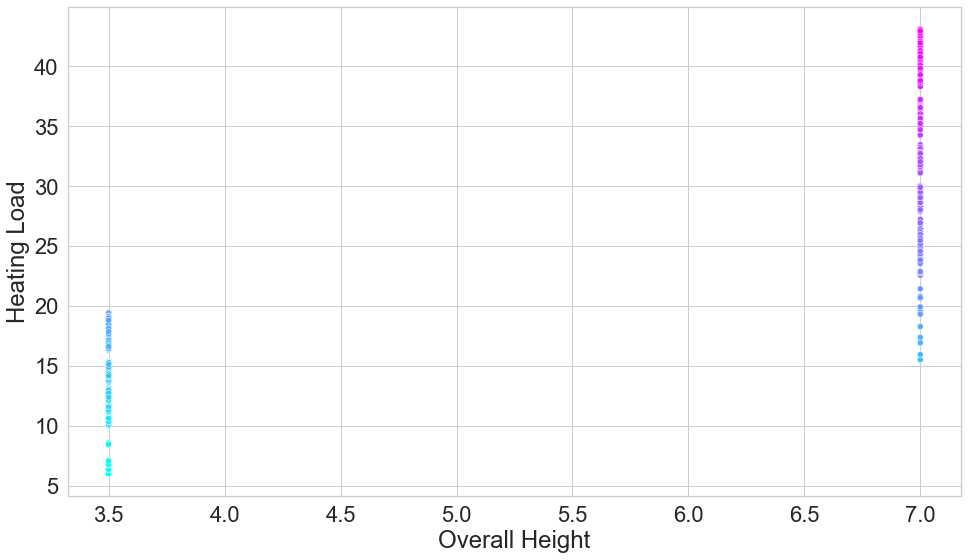

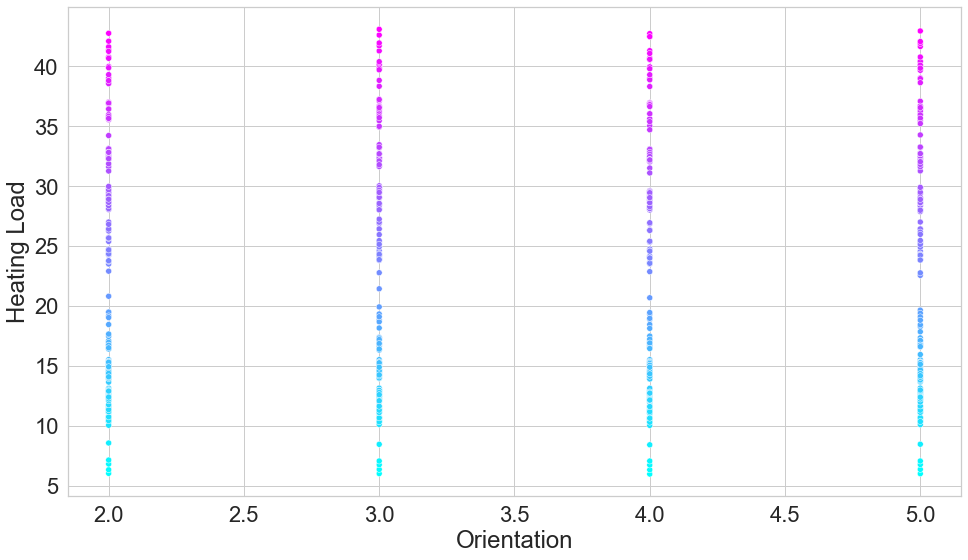

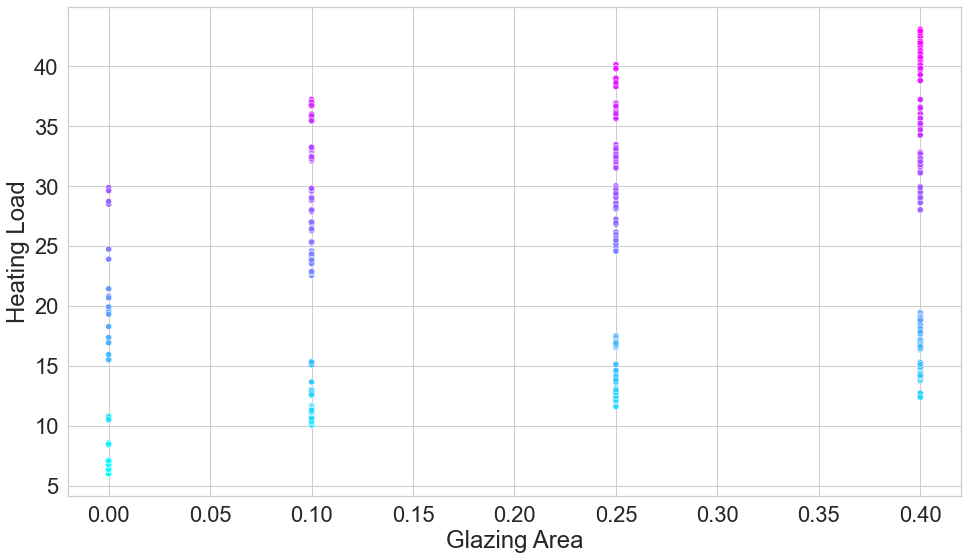

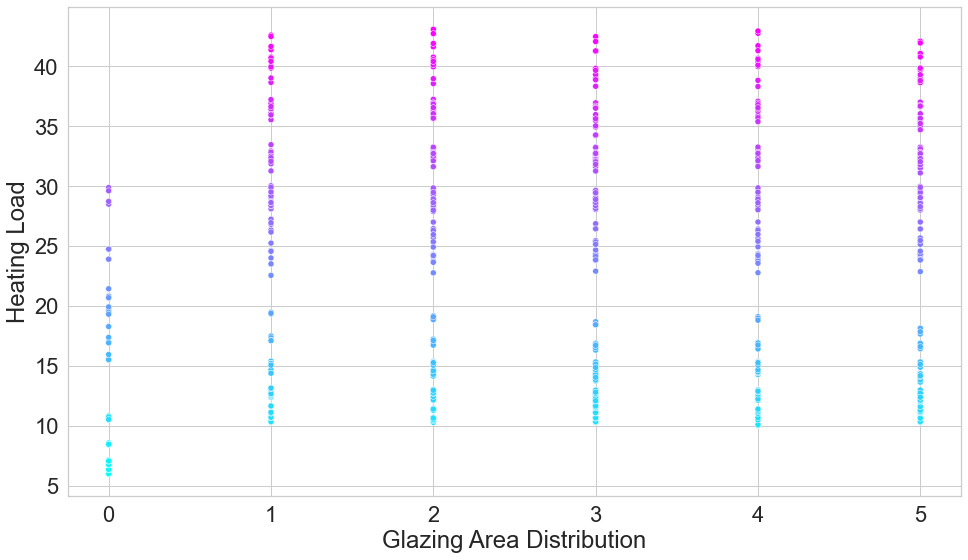

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in df.columns[:8]:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=df, x=feature, y='Heating Load', 
                     hue='Heating Load', 
                     palette='cool', legend=False)

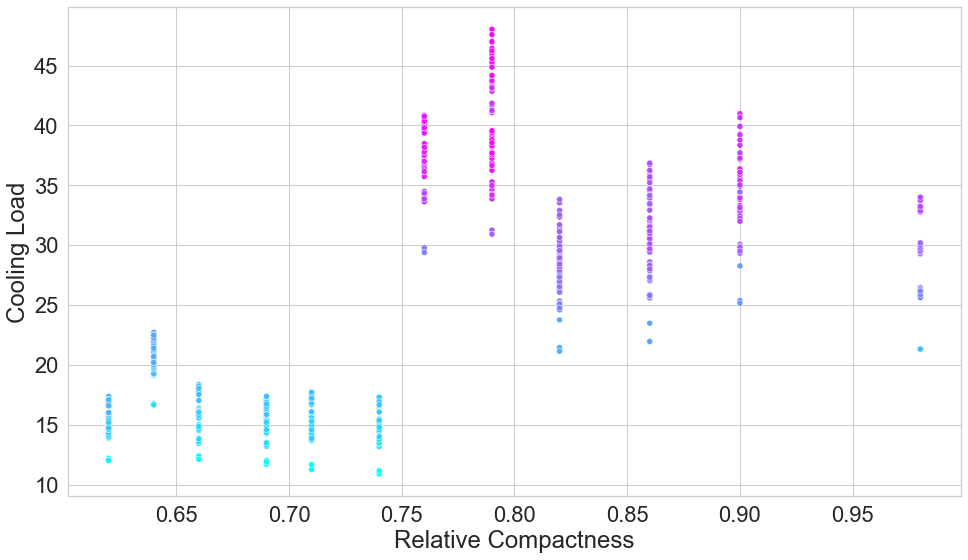

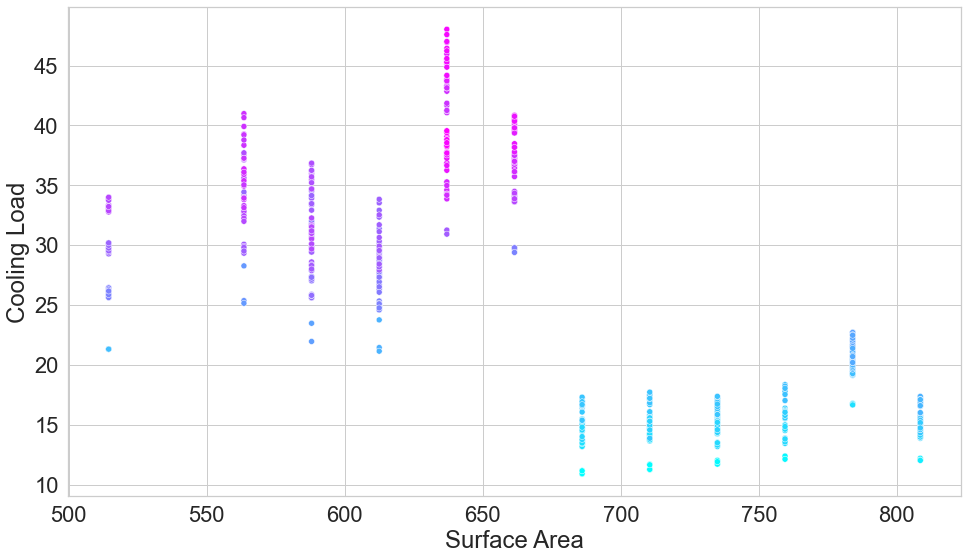

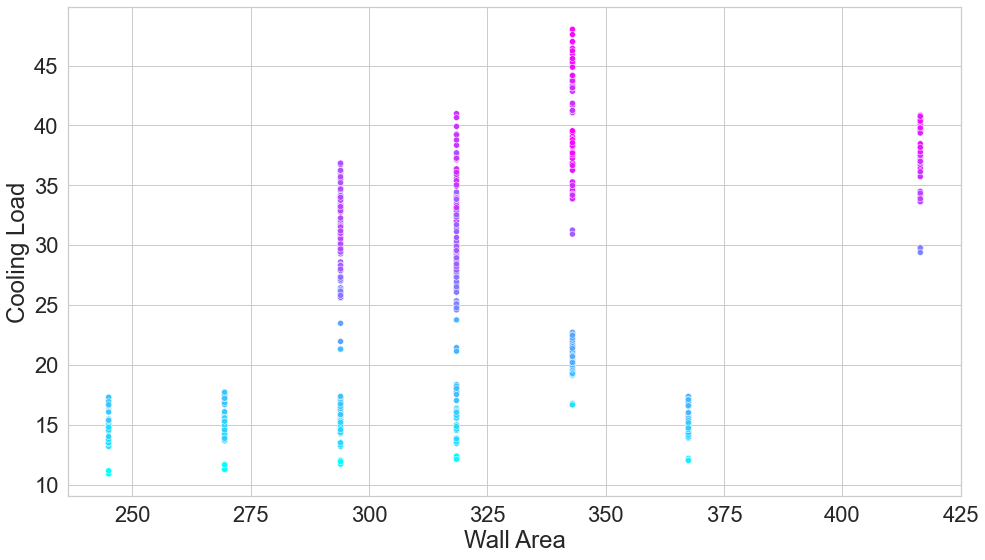

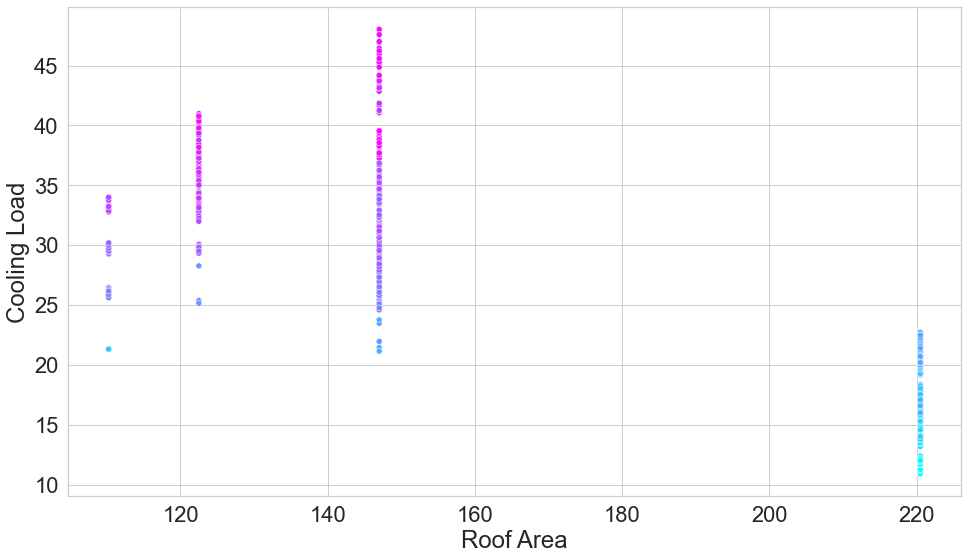

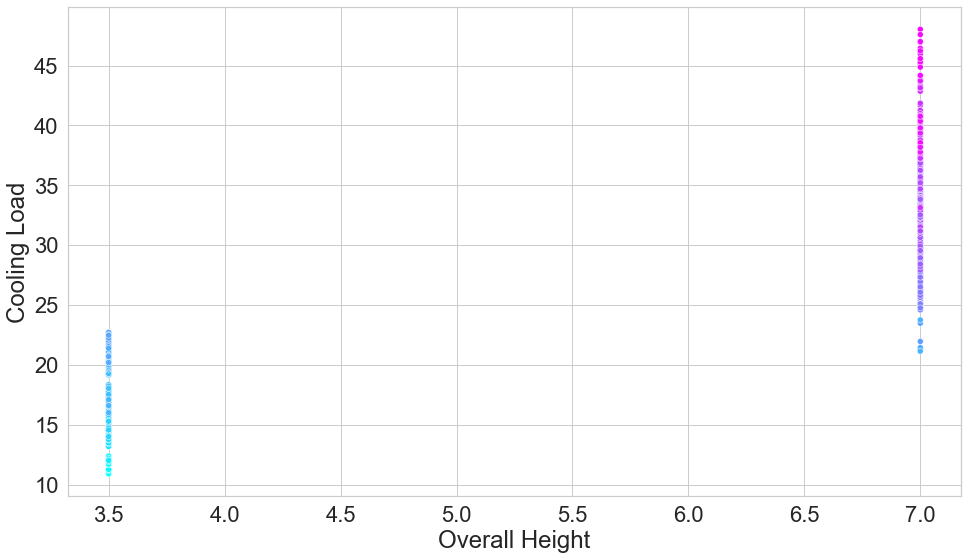

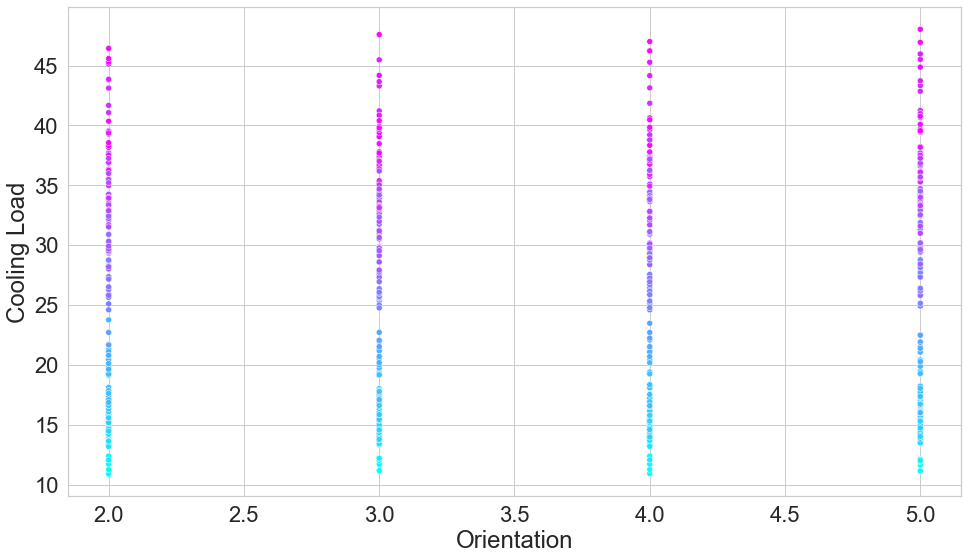

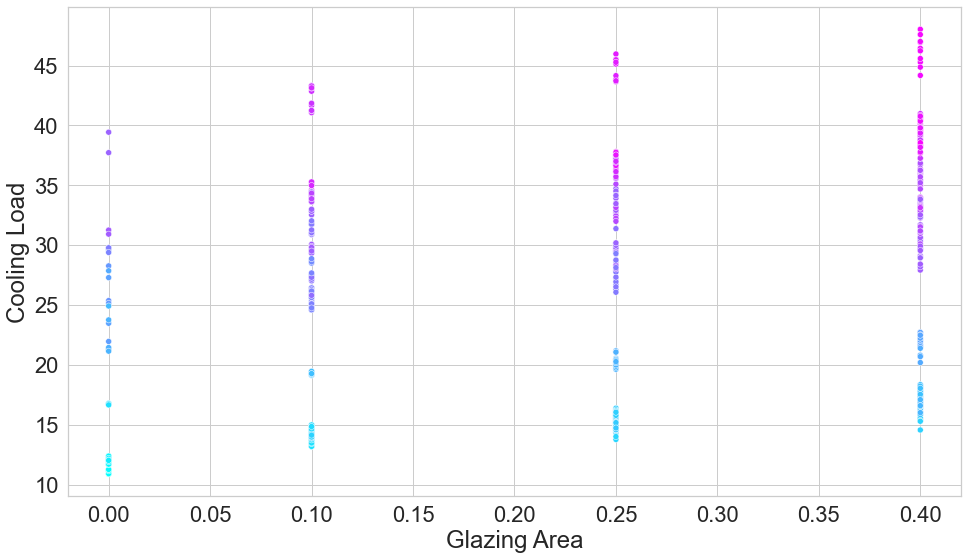

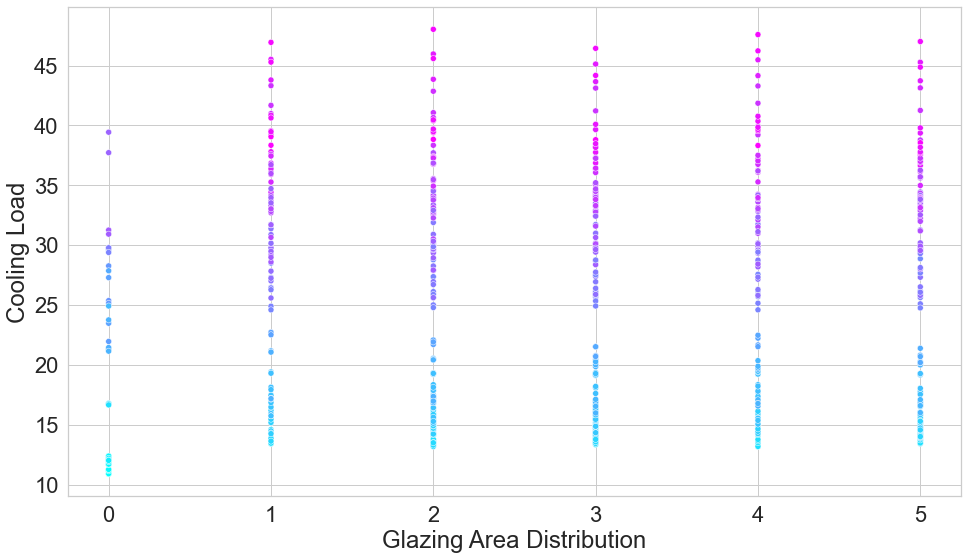

In [12]:

sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in df.columns[:8]:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=df, x=feature, y='Cooling Load', 
                     hue='Heating Load', 
                     palette='cool', legend=False)

In [13]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(['Heating Load', 'Cooling Load'],axis=1).copy()  # independant features
y = df[['Heating Load', 'Cooling Load']]			# dependant variable
#y2 = df['Cooling Load'].values

In [15]:
X_scaled = X.copy()
X_scaled[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',\
       'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']] = \
StandardScaler().fit_transform(X[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',\
       'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']])


In [16]:
X_scaled.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575


In [17]:
X_features = X_scaled.columns

X_train, X_test, y_train, y_test = \
    train_test_split(X_scaled, y, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (576, 8)
Shape of testing  set = (192, 8)


In [18]:
y_train

,Heating Load,Cooling Load
155,26.46,27.40
127,10.68,14.21
647,39.68,40.10
365,12.29,15.40
470,12.86,16.17
...,...,...
269,10.70,13.75
337,28.57,29.69
91,15.21,19.32
80,11.11,14.28


## LR

In [19]:
from sklearn.linear_model import LinearRegression

linear_regression1 = LinearRegression()
linear_regression1.fit(X=X_train.values, y=y_train["Heating Load"].values)
print("Heating Load")
for i, name in enumerate(X_features):
    print(f'\t{name:}: {linear_regression1.coef_[i]:24.20f}')


print(f'\ty-intercept: {linear_regression1.intercept_:23.20f}')

Heating Load
	Relative Compactness:  -6.80614554298581619918
	Surface Area:  -3.64262890032972208587
	Wall Area:   0.74202197048933304924
	Roof Area:  -3.91043294828970422472
	Overall Height:   7.53386790743426182360
	Orientation:  -0.01709531826055590842
	Glazing Area:   2.66909670790654018901
	Glazing Area Distribution:   0.27116868759499856978
	y-intercept: 22.28710859051515313922


In [20]:
import math
from sklearn import metrics

predicted1 = linear_regression1.predict(X_test.values)
expected1 = y_test["Heating Load"].values

r2 = metrics.r2_score(expected1, predicted1)
r  = math.sqrt(r2)
rmse = metrics.mean_squared_error(expected1, predicted1)
mape = metrics.mean_absolute_percentage_error(expected1, predicted1)

print(f'coefficient of determination = {r2:.3f}')
print(f'     correlation coefficient = {r:.3f}')
print(f'     root mean squared error = {rmse:.3f}')
print(f'     mean absolute percentage error = {mape:.3f}')

coefficient of determination = 0.915
     correlation coefficient = 0.956
     root mean squared error = 8.703
     mean absolute percentage error = 0.100


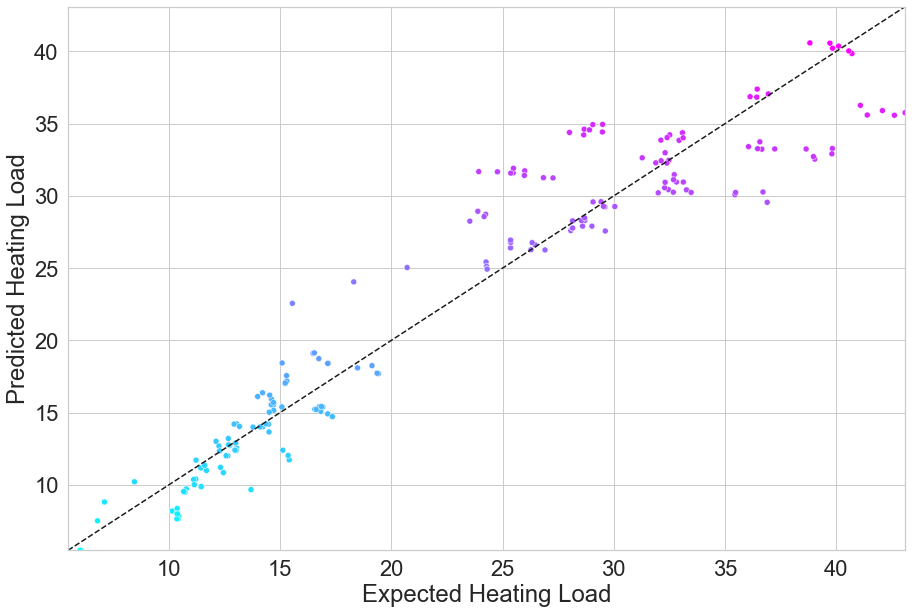

In [21]:
# df = pd.DataFrame()

# df['Expected']  = pd.Series(expected1)
# df['Predicted'] = pd.Series(predicted1)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(x=expected1, y=predicted1, 
                       hue=predicted1, palette='cool', 
                       legend=False)
plt.xlabel("Expected Heating Load")
plt.ylabel("Predicted Heating Load")

start = min(expected1.min(), predicted1.min())
end   = max(expected1.max(), predicted1.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

Cooling Load
	Relative Compactness:  -7.39737249224481718812
	Surface Area:  -3.84650670660941251811
	Wall Area:   0.10148922245028713096
	Roof Area:  -3.79989186714006610401
	Overall Height:   7.66726465760452136067
	Orientation:   0.13290095240019750289
	Glazing Area:   1.98126930169769721601
	Glazing Area Distribution:   0.00203745967404310446
	y-intercept: 24.60815043320391382053

Performance Metrics:
coefficient of determination = 0.892
     correlation coefficient = 0.945
     root mean squared error = 9.742
     mean absolute percentage error = 0.088



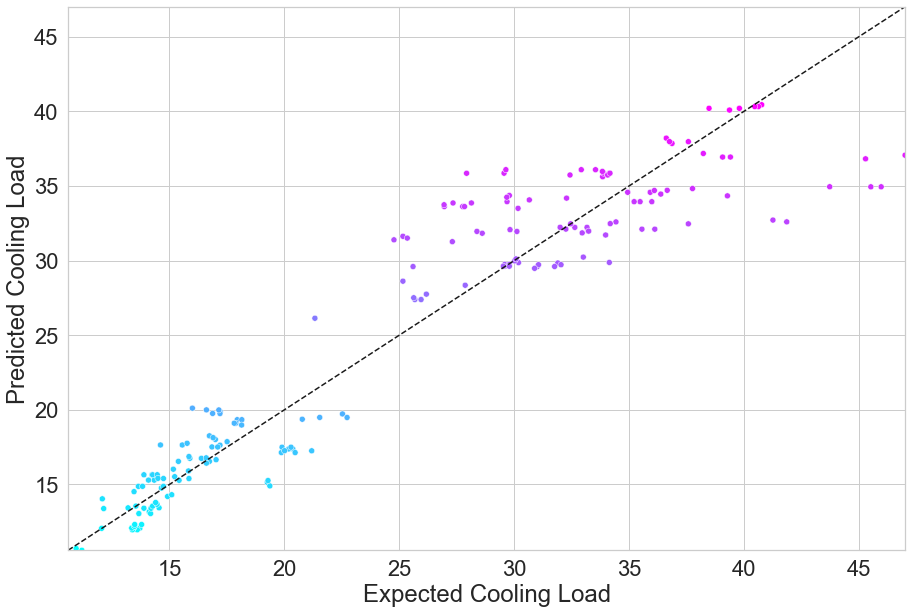

In [22]:
linear_regression2 = LinearRegression()
linear_regression2.fit(X=X_train.values, y=y_train["Cooling Load"].values)
print("Cooling Load")

for i, name in enumerate(X_features):
    print(f'\t{name:}: {linear_regression2.coef_[i]:24.20f}')


print(f'\ty-intercept: {linear_regression2.intercept_:23.20f}')


predicted2 = linear_regression2.predict(X_test.values)
expected2  = y_test["Cooling Load"].values

r2_cooling_model = metrics.r2_score(expected2, predicted2)
r_cooling_model  = math.sqrt(r2_cooling_model)

rmse_cooling_model = metrics.mean_squared_error(expected2, predicted2)
mape_cooling_model = metrics.mean_absolute_percentage_error(expected2, predicted2)
print("\nPerformance Metrics:")
print(f'coefficient of determination = {r2_cooling_model:.3f}')
print(f'     correlation coefficient = {r_cooling_model:.3f}')
print(f'     root mean squared error = {rmse_cooling_model:.3f}')
print(f'     mean absolute percentage error = {mape_cooling_model:.3f}\n')


figure2 = plt.figure(figsize=(15, 10))

axes2 = sns.scatterplot(x=expected2, y=predicted2, 
                       hue=predicted2, palette='cool', 
                       legend=False)
plt.xlabel("Expected Cooling Load")
plt.ylabel("Predicted Cooling Load")

start2 = min(expected2.min(), predicted2.min())
end2  = max(expected2.max(), predicted2.max())

axes2.set_xlim(start2, end2)
axes2.set_ylim(start2, end2)

line2 = plt.plot([start2, end2], [start2, end2], 'k--')

## =====================================================

## Two linear regression models have been developed to predict the Heating Load and Cooling load, repectivly. The same input features, regressors, are used for both models which includes 'Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution'. The preformance of models has been measured through different metrics such as r2, rmse and mape.The second model which predict the cooling load performs slightly better than the first one. However, two models shows good performance in particular, mape are less than 10%. 
## In the upper bound, the models moderately underestimate the expected values. We may try the feature engineering to improve the model performance using square of current features (X^2) as additional regresors.  


## Also the coeffiecients are showing the direct relation between Heating/Cooling Load with Overall Height and Glazing area

## =====================================================